In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.activations import relu
from sklearn.preprocessing import MinMaxScaler

In [44]:
Df = pd.read_csv("Readings.csv")
Df['Timestamp(HMS)'] = pd.to_datetime(Df['Timestamp(HMS)'])
Df.set_index('Timestamp(HMS)', inplace=True)
Df = Df.resample('1T').mean()

C:\Users\Vighnesh\AppData\Local\Temp\ipykernel_20592\1962747024.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Df['Timestamp(HMS)'] = pd.to_datetime(Df['Timestamp(HMS)'])


In [45]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(Df)

In [46]:
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

In [47]:
def create_sequences(data, sequence_length):
    X = []
    y = []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)

sequence_length = 10  # Define the length of the input sequence

X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

In [48]:
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(sequence_length, 1)))
model.add(LSTM(units=100))
model.add(Dense(units=1))  # Adjust the units based on your problem (e.g., regression, classification)

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=10, batch_size=32)  # Adjust the number of epochs and batch size as needed

Epoch 1/10
2/2 [==============================] - 5s 29ms/step - loss: 0.0772
Epoch 2/10
2/2 [==============================] - 0s 16ms/step - loss: 0.0269
Epoch 3/10
2/2 [==============================] - 0s 18ms/step - loss: 0.0051
Epoch 4/10
2/2 [==============================] - 0s 19ms/step - loss: 0.0194
Epoch 5/10
2/2 [==============================] - 0s 17ms/step - loss: 0.0147
Epoch 6/10
2/2 [==============================] - 0s 19ms/step - loss: 0.0067
Epoch 7/10
2/2 [==============================] - 0s 18ms/step - loss: 0.0068
Epoch 8/10
2/2 [==============================] - 0s 19ms/step - loss: 0.0090
Epoch 9/10
2/2 [==============================] - 0s 16ms/step - loss: 0.0094
Epoch 10/10
2/2 [==============================] - 0s 16ms/step - loss: 0.0078


In [49]:
predicted_values = model.predict(X_test)

1/1 [==============================] - 1s 833ms/step


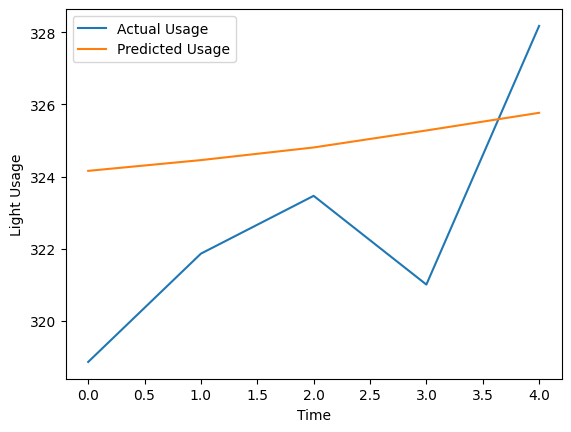

In [51]:
import matplotlib.pyplot as plt

# Inverse transform the scaled values to the original scale
predicted_values_original = scaler.inverse_transform(predicted_values)
y_test_original = scaler.inverse_transform(y_test)

# Plot the actual values
plt.plot(y_test_original, label='Actual Usage')

# Plot the predicted values
plt.plot(predicted_values_original, label='Predicted Usage')

plt.xlabel('Time')
plt.ylabel('Light Usage')
plt.legend()
plt.show()
